#  My Problem

  The Titanic dataset challenges you to predict survival based on passenger attributes. Your goal is to build a predictive model to answer: "Who is likely to survive?"

# Environment Setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print('Train Shape:',train.shape)
print('Test Shape:',test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


#  EDA


In [3]:
train.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
train["Survived"].value_counts()

,count
Survived,
0,549
1,342


# EDA & Preprocessing
 Handle Missing Values


In [12]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
train["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [14]:
train.groupby('Embarked')["Survived"].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [15]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


# Data Cleaning

In [16]:
train_age=np.random.randint(train["Age"].mean()-train["Age"].std(),train["Age"].mean()+train["Age"].std(),177)

In [17]:
test_age=np.random.randint(test["Age"].mean()-test["Age"].std(),test["Age"].mean()+test["Age"].std(),86)

In [18]:
train["Age"][train["Age"].isnull()] = train_age
test["Age"][test["Age"].isnull()] = test_age

In [19]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
train["Embarked"].fillna("S",inplace=True)

In [21]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [23]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [24]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
(327/891)*100

36.7003367003367

In [27]:
# in cabin column many data is Missing.we drop this column
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

In [28]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [29]:
test.isnull( ).sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


# EDA
### VISUALIZATION


In [30]:
train["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [31]:
train.groupby('Pclass')["Survived"].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


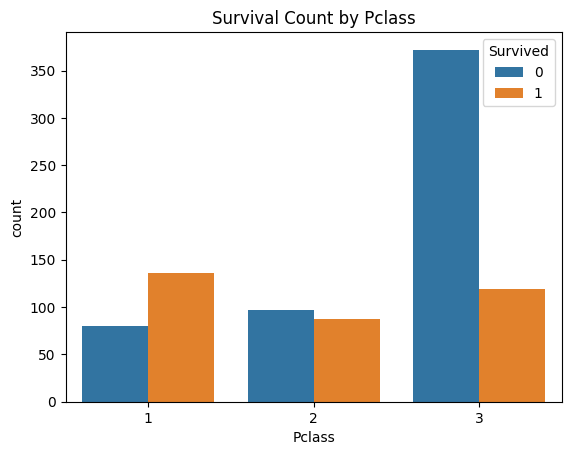

In [32]:
sns.countplot(data=train, x="Pclass", hue="Survived")
plt.title("Survival Count by Pclass")
plt.show()

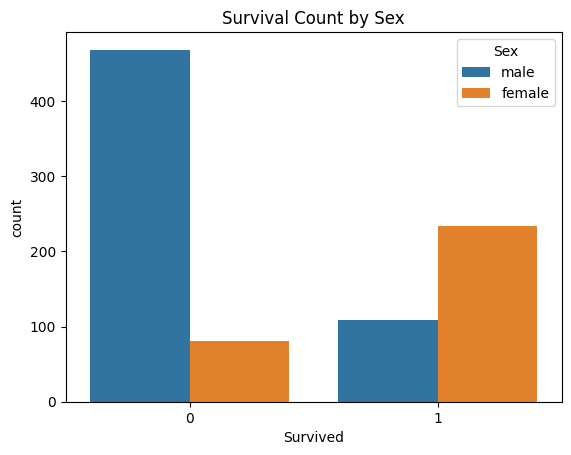

In [33]:
sns.countplot(data=train, x="Survived", hue="Sex")
plt.title("Survival Count by Sex")
plt.show()

In [34]:
train.groupby('Sex')["Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [35]:
train["Embarked" ].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [36]:
train.groupby('Embarked')["Survived"].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


<Axes: xlabel='Survived', ylabel='count'>

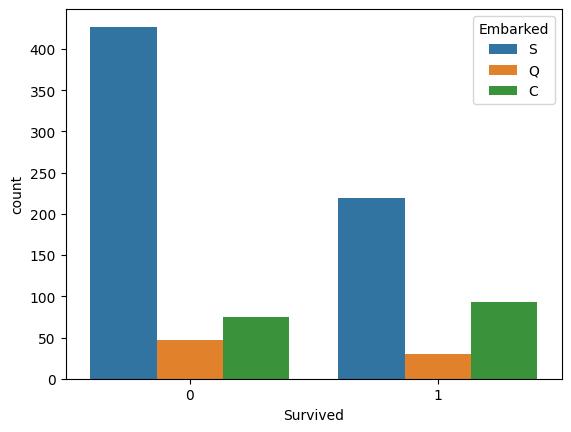

In [37]:
sns.countplot(data=train,x="Survived",hue="Embarked")

In [38]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


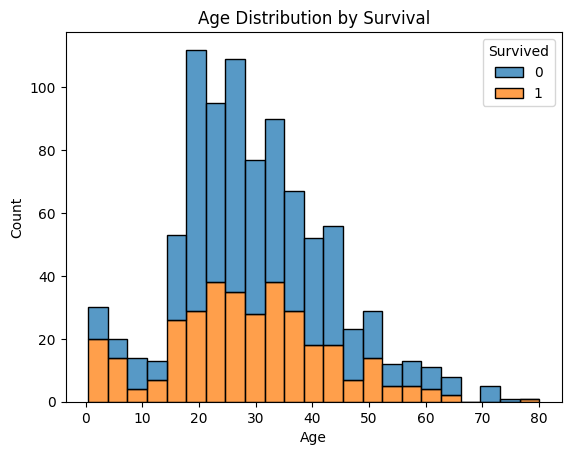

In [39]:
sns.histplot(data=train, x="Age", hue="Survived", multiple="stack")
plt.title("Age Distribution by Survival")
plt.show()


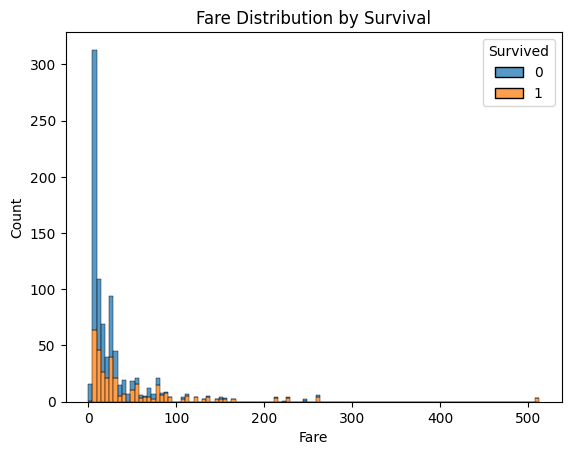

In [40]:
sns.histplot(data=train, x="Fare", hue="Survived", multiple="stack")
plt.title("Fare Distribution by Survival")
plt.show()

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [42]:
train["Ticket"].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


In [43]:
train["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [44]:
train["Parch"].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


# Feature Engineering

## 1-Feature Construction

In [45]:
train["Family_size"]=train["SibSp"]+train["Parch"]+1
test["Family_size"]=test["SibSp"]+test["Parch"]+1

In [46]:
train["Family_size"].value_counts()

,count
Family_size,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [47]:
train.groupby('Family_size')["Survived"].mean()

,Survived
Family_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [48]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<=4:
        return "Medium"
    else:
        return "Large"

In [49]:
train["Family_type"]=train["Family_size"].apply(cal)
test["Family_type"]=test["Family_size"].apply(cal)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Alone


In [51]:
# Discriterization

train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 60, 120], labels=['Child', 'Teen', 'Adult', 'Senior'])
test['AgeGroup'] = pd.cut(test['Age'], bins=[0, 12, 18, 60, 120], labels=['Child', 'Teen', 'Adult', 'Senior'])


In [52]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type,AgeGroup
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q,1,Alone,Adult
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,C,2,Medium,Adult
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,S,2,Medium,Adult
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,S,1,Alone,Adult
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,S,1,Alone,Adult


In [53]:
train['FarePerPerson'] = train['Fare'] / (train['Family_size'] + 1)  # Add 1 to include the passenger themselves.
test['FarePerPerson'] = test['Fare'] / (test['Family_size'] + 1)

In [54]:
train["Name"]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [55]:
#train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train["Title"]=train["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test["Title"]=test["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [56]:
train.groupby('Embarked')['Fare'].transform('mean').value_counts()

,count
Fare,
27.243651,646
59.954144,168
13.276030,77


In [57]:
mean_fare = train.groupby('Embarked')['Fare'].transform('mean')
train['MeanFareByEmbarked'] = mean_fare



In [58]:
mean_fare = test.groupby('Embarked')['Fare'].transform('mean')
test['MeanFareByEmbarked'] = mean_fare

## 2-Feature Selection

In [59]:
PassengerId =df["PassengerId"]

NameError: name 'df' is not defined

In [ ]:
test.head()

,Pclass,Sex,Family_type,AgeGroup,FarePerPerson,Title,MeanFareByEmbarked
0,3,male,Alone,Adult,3.914600,Mr,10.957700
1,3,female,Medium,Adult,2.333333,Mrs,28.257832
2,2,male,Alone,Senior,4.843750,Mr,10.957700
3,3,male,Alone,Adult,4.331250,Mr,28.257832
4,3,female,Medium,Adult,3.071875,Mrs,28.257832


In [60]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [61]:
test.to_csv("select_titanic_field.csv",index=False)

In [ ]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type,AgeGroup,FarePerPerson,Title,MeanFareByEmbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,2,Medium,Adult,2.416667,Mr,27.243651


In [ ]:
# Drop Columns

# 1- PassengerId
# 2- Name
# 3- SibSp
# 4- Parch
# 5- Ticket
# 6- Fare
# 7- Age
# 8- Embarked
# 9- Family_size

train.drop(["PassengerId","Name","SibSp","Parch","Ticket","Fare","Age","Embarked","Family_size"],axis=1,inplace=True)

In [ ]:
test.drop(["PassengerId","Name","SibSp","Parch","Ticket","Fare","Age","Embarked","Family_size"],axis=1,inplace=True)

In [ ]:
# important Features

train.head()

,Survived,Pclass,Sex,Family_type,AgeGroup,FarePerPerson,Title,MeanFareByEmbarked
0,0,3,male,Medium,Adult,2.416667,Mr,27.243651
1,1,1,female,Medium,Adult,23.761100,Mrs,59.954144
2,1,3,female,Alone,Adult,3.962500,Miss,27.243651
3,1,1,female,Medium,Adult,17.700000,Mrs,27.243651
4,0,3,male,Alone,Adult,4.025000,Mr,27.243651


# 3-Handle Categorical Data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Survived            891 non-null    int64   
 1   Pclass              891 non-null    int64   
 2   Sex                 891 non-null    object  
 3   Family_type         891 non-null    object  
 4   AgeGroup            891 non-null    category
 5   FarePerPerson       891 non-null    float64 
 6   Title               891 non-null    object  
 7   MeanFareByEmbarked  891 non-null    float64 
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 49.9+ KB


In [ ]:
X_train.head()

,Pclass,Sex,Family_type,AgeGroup,FarePerPerson,Title,MeanFareByEmbarked
331,1,male,Alone,Adult,14.250000,Mr,27.243651
733,2,male,Alone,Adult,6.500000,Mr,27.243651
382,3,male,Alone,Adult,3.962500,Mr,27.243651
704,3,male,Medium,Adult,2.618067,Mr,27.243651
813,3,female,Large,Child,3.909375,Miss,27.243651


In [ ]:
train.to_csv("train_clean.csv",index=False)
test.to_csv("test_clean.csv",index=False)

In [ ]:
train.groupby('Title')['Survived'].transform('mean')

,Survived
0,0.156673
1,0.792000
2,0.697802
3,0.792000
4,0.156673
...,...
886,0.000000
887,0.697802
888,0.697802
889,0.156673


In [ ]:
train.head()

,Survived,Pclass,Sex,Family_type,AgeGroup,FarePerPerson,Title,MeanFareByEmbarked
0,0,3,male,Medium,Adult,2.416667,Mr,27.243651
1,1,1,female,Medium,Adult,23.761100,Mrs,59.954144
2,1,3,female,Alone,Adult,3.962500,Miss,27.243651
3,1,1,female,Medium,Adult,17.700000,Mrs,27.243651
4,0,3,male,Alone,Adult,4.025000,Mr,27.243651


# Model Building

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier








# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['Sex', 'AgeGroup',"Family_type","Title"]),

        ('scaling', StandardScaler(), ['FarePerPerson', 'MeanFareByEmbarked'])
    ],
    remainder='passthrough'  # Keep all other columns as-is
)

# Apply the column transformer
train_transformed_data = preprocessor.fit_transform(train)
train_transformed_data = pd.DataFrame(train_transformed_data)

# Display transformed data
print(train_transformed_data)

                                                     0
0      (0, 0)\t1.0\n  (0, 5)\t1.0\n  (0, 16)\t1.0\n...
1      (0, 5)\t1.0\n  (0, 17)\t1.0\n  (0, 22)\t0.64...
2      (0, 13)\t1.0\n  (0, 22)\t-0.3919072237168917...
3      (0, 5)\t1.0\n  (0, 17)\t1.0\n  (0, 22)\t0.32...
4      (0, 0)\t1.0\n  (0, 16)\t1.0\n  (0, 22)\t-0.3...
..                                                 ...
886    (0, 0)\t1.0\n  (0, 19)\t1.0\n  (0, 22)\t-0.2...
887    (0, 13)\t1.0\n  (0, 22)\t0.18559087486918865...
888    (0, 5)\t1.0\n  (0, 13)\t1.0\n  (0, 22)\t-0.3...
889    (0, 0)\t1.0\n  (0, 16)\t1.0\n  (0, 22)\t0.18...
890    (0, 0)\t1.0\n  (0, 16)\t1.0\n  (0, 22)\t-0.3...

[891 rows x 1 columns]


In [ ]:
train.head()

,Survived,Pclass,Sex,Family_type,AgeGroup,FarePerPerson,Title,MeanFareByEmbarked
0,0,3,male,Medium,Adult,2.416667,Mr,27.243651
1,1,1,female,Medium,Adult,23.761100,Mrs,59.954144
2,1,3,female,Alone,Adult,3.962500,Miss,27.243651
3,1,1,female,Medium,Adult,17.700000,Mrs,27.243651
4,0,3,male,Alone,Adult,4.025000,Mr,27.243651


In [ ]:
train.rename(columns={"Title_encoded":"Title","Family_type_encoded":"Family_type"}, inplace=True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the ColumnTransformer for preprocessing
# Handle unknown categories in the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Sex', 'AgeGroup', 'Family_type', 'Title']), # Modified line
        ('scaling', StandardScaler(), ['FarePerPerson', 'MeanFareByEmbarked'])
    ],
    remainder='passthrough'  # Keep all other columns as-is
)

# Split data into features (X) and target (y)
X = train.drop(columns='Survived')
y = train['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a classifier (RandomForest)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# Predict and evaluate the accuracy
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'RandomForest Accuracy: {accuracy_rf:.4f}')

# Create a pipeline with preprocessing and a classifier (DecisionTree)
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Train the model
pipeline_dt.fit(X_train, y_train)

# Predict and evaluate the accuracy
y_pred_dt = pipeline_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'DecisionTree Accuracy: {accuracy_dt:.4f}')

RandomForest Accuracy: 0.8156
DecisionTree Accuracy: 0.7821


In [ ]:
train.head()

,Survived,Pclass,Sex,Family_type,AgeGroup,FarePerPerson,Title,MeanFareByEmbarked
0,0,3,male,Medium,Adult,2.416667,Mr,27.243651
1,1,1,female,Medium,Adult,23.761100,Mrs,59.954144
2,1,3,female,Alone,Adult,3.962500,Miss,27.243651
3,1,1,female,Medium,Adult,17.700000,Mrs,27.243651
4,0,3,male,Alone,Adult,4.025000,Mr,27.243651


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Sex', 'AgeGroup', 'Family_type', 'Title']),
        ('scaling', StandardScaler(), ['FarePerPerson', 'MeanFareByEmbarked'])
    ],
    remainder='passthrough'  # Keep all other columns as-is
)

# Split data into features (X) and target (y)
X = train.drop(columns='Survived')
y = train['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and RandomForestClassifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid for RandomForest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search for RandomForest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best model and evaluate it
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'RandomForest Best Parameters: {grid_search_rf.best_params_}')
print(f'RandomForest Accuracy after Tuning: {accuracy_rf:.4f}')

# Create a pipeline with preprocessing and DecisionTreeClassifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameter grid for DecisionTree
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search for DecisionTree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best model and evaluate it
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'DecisionTree Best Parameters: {grid_search_dt.best_params_}')
print(f'DecisionTree Accuracy after Tuning: {accuracy_dt:.4f}')


RandomForest Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
RandomForest Accuracy after Tuning: 0.8380
DecisionTree Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
DecisionTree Accuracy after Tuning: 0.7989


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Sex', 'AgeGroup', 'Family_type', 'Title']),
        ('scaling', StandardScaler(), ['FarePerPerson', 'MeanFareByEmbarked'])
    ],
    remainder='passthrough'  # Keep all other columns as-is
)

# Split data into features (X) and target (y)
X = train.drop(columns='Survived')
y = train['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define algorithms and their parameter grids
algorithms = {
    'RandomForest': (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }),
    'LogisticRegression': (LogisticRegression(max_iter=500, random_state=42), {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'lbfgs']
    }),
    'SVM': (SVC(random_state=42), {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']
    }),
    'GradientBoosting': (GradientBoostingClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 10]
    })
}

# Iterate through algorithms, apply GridSearchCV, and evaluate
for name, (model, param_grid) in algorithms.items():
    print(f"\nTraining {name}...")

    # Create a pipeline with preprocessing and the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model and evaluate
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Accuracy: {accuracy:.4f}")



Training RandomForest...
RandomForest Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
RandomForest Accuracy: 0.8380

Training DecisionTree...
DecisionTree Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
DecisionTree Accuracy: 0.7989

Training LogisticRegression...
LogisticRegression Best Parameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
LogisticRegression Accuracy: 0.8156

Training SVM...
SVM Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
SVM Accuracy: 0.8268

Training GradientBoosting...
GradientBoosting Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
GradientBoosting Accuracy: 0.8380


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Sex', 'AgeGroup', 'Family_type', 'Title']),
        ('scaling', StandardScaler(), ['FarePerPerson', 'MeanFareByEmbarked'])
    ],
    remainder='passthrough'  # Keep all other columns as-is
)

# Split data into features (X) and target (y)
X = train.drop(columns='Survived')
y = train['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and RandomForestClassifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_depth=10,
        min_samples_split=5,
        n_estimators=200,
        random_state=42
    ))
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = pipeline_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on testing data
y_test_pred = pipeline_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Analyze overfitting
if train_accuracy - test_accuracy > 0.1:  # Define a threshold (e.g., 10% difference)
    print("The model may be overfitting!")
else:
    print("The model does not appear to be overfitting.")


Training Accuracy: 0.8961
Testing Accuracy: 0.8380
The model does not appear to be overfitting.


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline_rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy: 0.8350


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[92 13]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [ ]:
import pickle

pickle.dump(pipeline_rf, open('model.pkl', 'wb'))

In [ ]:
df=pd.read_csv("test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Make predictions on the test dataset
test_predictions = pipeline_rf.predict(test)

# Get PassengerIds from the test dataset
PassengerId = df['PassengerId']  # Access the 'PassengerId' column from your 'test' DataFrame

# Add predictions to a new DataFrame
submission = pd.DataFrame({
    'PassengerId': PassengerId,  # Passenger IDs from the test file
    'Survived': test_predictions         # Your model's predictions
})

In [ ]:
# Save to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")


Submission file 'submission.csv' created successfully!


In [ ]:
sub=pd.read_csv("submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
